## Load data and split it into train and validation.

In [1]:
!git clone https://github.com/versotym/corpusCzechVerse

Cloning into 'corpusCzechVerse'...
remote: Enumerating objects: 1328, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 1328 (delta 4), reused 0 (delta 0), pack-reused 1312
Receiving objects: 100% (1328/1328), 278.87 MiB | 4.38 MiB/s, done.
Resolving deltas: 100% (1302/1302), done.
Updating files: 100% (1306/1306), done.


In [1]:
import json
import os
import glob
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import pickle
import re
import numpy as np

def extract_poems(folder_path):
    poem_lines = []
    for file_path in glob.glob(os.path.join(folder_path, '*.json')):
        with open(file_path, 'r', encoding='us-ascii') as file:
            data = json.load(file)
            for body in data:
                for stanza in body['body']:
                    for line in stanza:
                        poem_lines.append(line['text'])
    return poem_lines

folder_path = r'./corpusCzechVerse/ccv'  # Replace with your folder path
data = extract_poems(folder_path)
n = len(data)
text = '\n'.join(data)
train_text = '\n'.join(data[:int(n*0.9)])
val_text = '\n'.join(data[int(n*0.9):])

In [3]:
print("Sample:\n", text[0:100])

Sample:
 Rozpřádá večer sítě své 
a teď je noří ve kouzlo;
můj bože! a to srdce mé
zas na ten hrad mi uklouzl


In [4]:
print(f"Data size (in characters): {len(text)}")

Data size (in characters): 71367053


[10515561, 4187995, 3534480, 3483460, 3030172, 2796212, 2728603, 2728463, 2578948, 2310916, 2063658, 2044163, 2039413, 1954324, 1899592, 1774188, 1726085, 1597608, 1575218, 1439987, 1356972, 1351076, 1350166, 1211036, 1085122, 1025240, 924409, 753968, 659657, 623825, 617555, 597484, 575648, 464080, 304444, 201910, 197718, 117636, 116009, 110910, 101419, 99290, 89208, 87719, 84341, 83929, 82673, 81932, 77190, 71357, 69419, 61409, 59662, 58410, 55970, 52698, 43300, 42028, 38311, 37432, 35777, 35645, 32992, 24403, 24003, 20489, 19585, 17371, 16048, 14414, 13856, 13130, 12225, 9159, 5976, 5672, 5099, 4330, 4164, 3627, 2668, 2286, 2223, 1277, 1014, 803, 671, 657, 554, 518, 328, 304, 299, 273, 230, 209, 189, 181, 169, 168, 160, 151, 148, 142, 134, 120, 117, 108, 92, 83, 78, 74, 73, 73, 64, 63, 60, 55, 54, 48, 46, 44, 42, 42, 41, 39, 37, 33, 32, 26, 24, 22, 15, 11, 10, 10, 8, 7, 7, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
[' ', 'e', 'o', 'a', 'n', 's', 'l', '

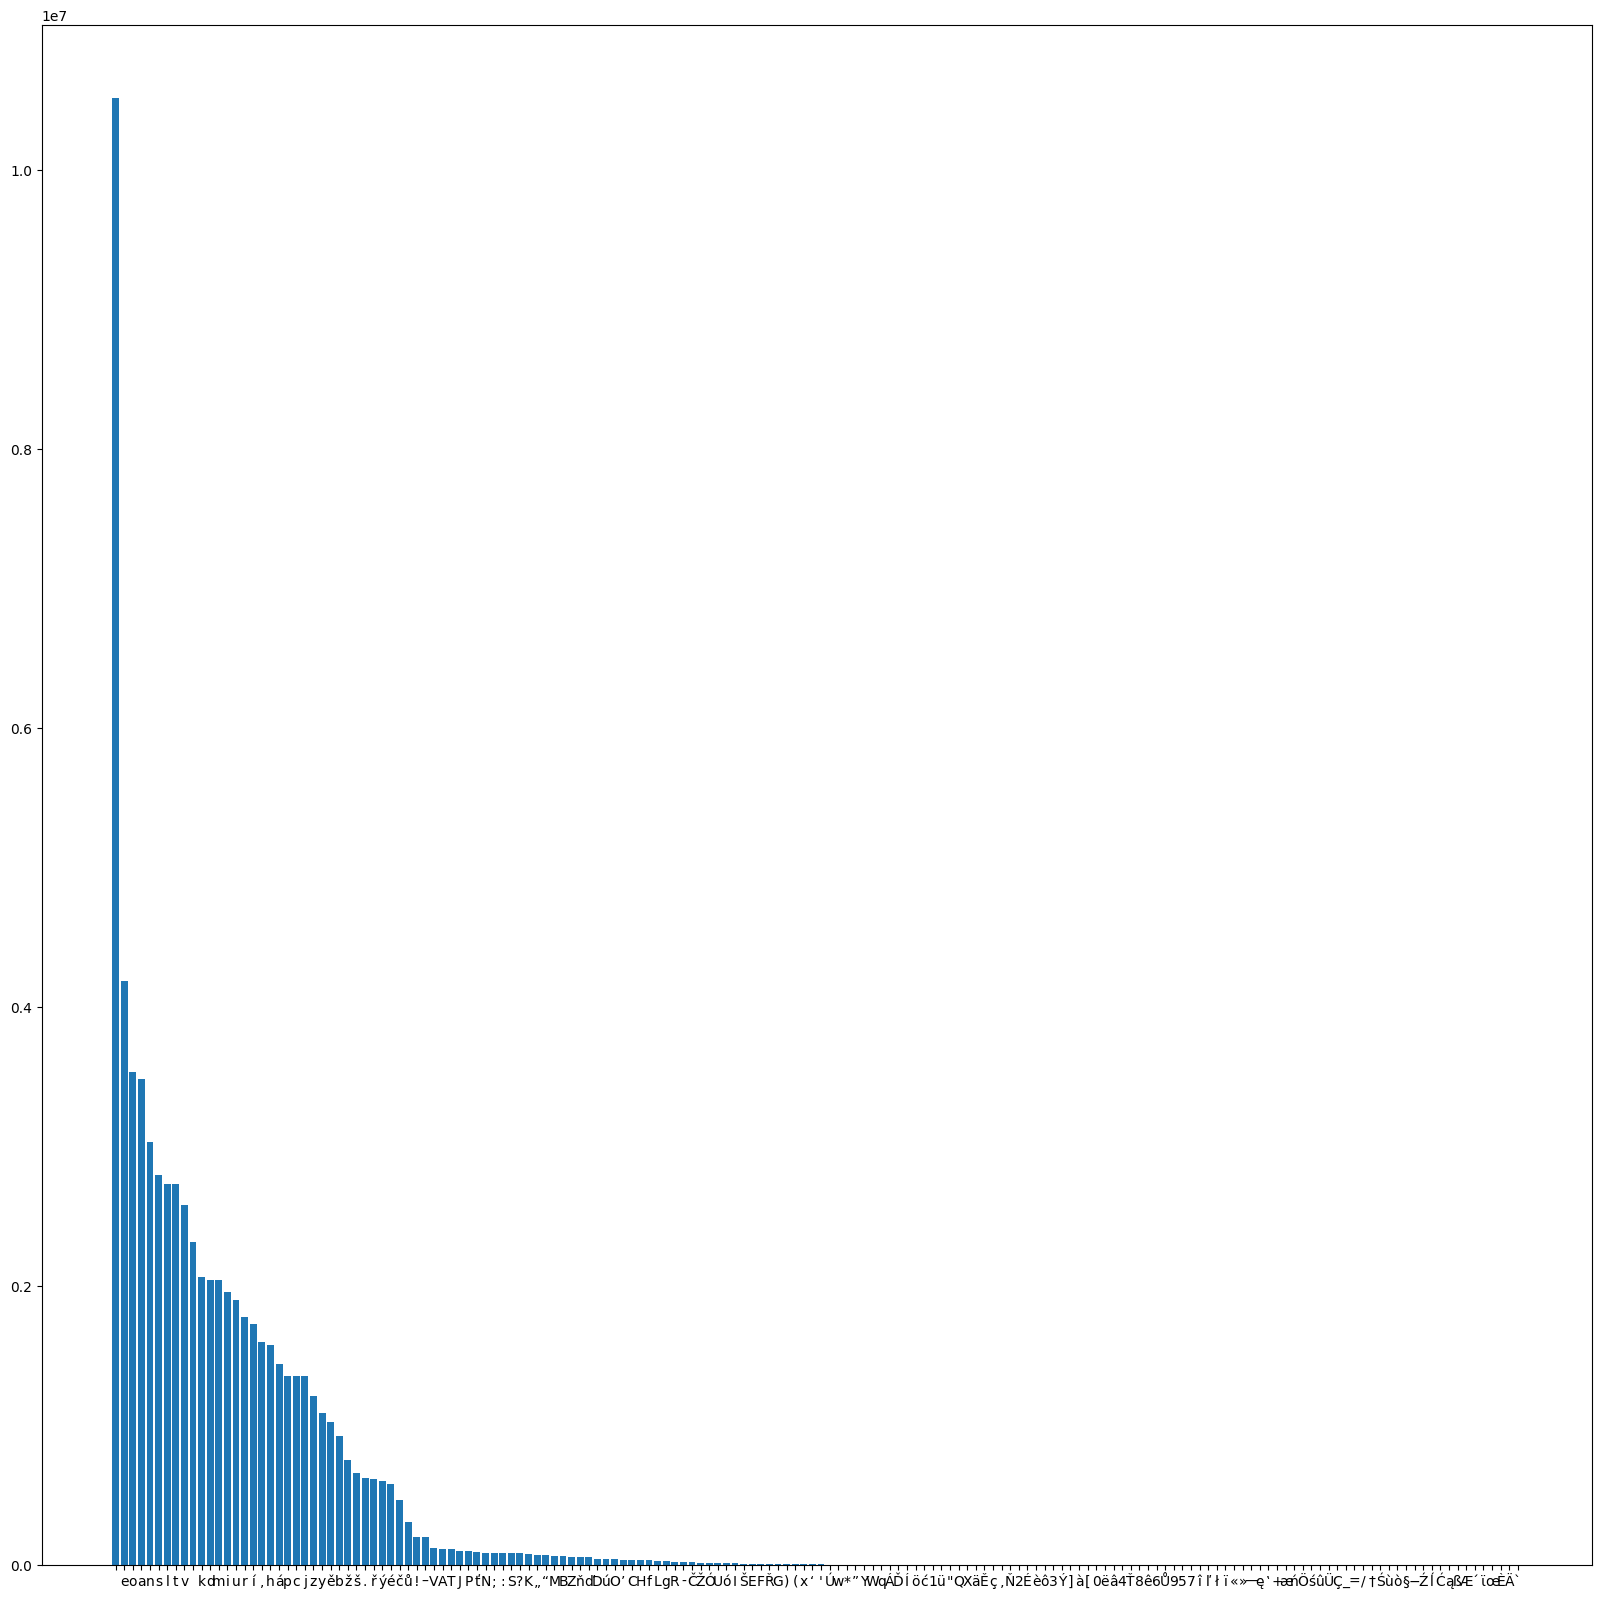

In [5]:
letter_counts = Counter(text)

def plot_bar_from_counter(counter, ax=None):
    """"
    This function creates a bar plot from a counter.

    :param counter: This is a counter object, a dictionary with the item as the key
     and the frequency as the value
    :param ax: an axis of matplotlib
    :return: the axis wit the object in it
    """

    if ax is None:
        fig = plt.figure(figsize=(20,20))
        ax = fig.add_subplot(111)

    frequencies = sorted(list(counter.values()), reverse=True)
    print(frequencies)
    names = [x for _, x in sorted(zip(list(counter.values()), list(counter.keys())), reverse=True)]
    print(names)

    x_coordinates = np.arange(len(counter))
    ax.bar(x_coordinates, frequencies, align='center')

    ax.xaxis.set_major_locator(plt.FixedLocator(x_coordinates))
    ax.xaxis.set_major_formatter(plt.FixedFormatter(names))

    return ax

plot_bar_from_counter(letter_counts)
plt.show()

## Character encoding

1) Get all characters from training corpus
2) Assign a unique numerical mapping between the characters and some number set

### Task: Get unique characters from text.

Extract unique characters.

In [6]:
keys = sorted(set(list(text)))

In [7]:
print(f"Unique characters in text: {len(keys)}")

Unique characters in text: 164


### Task: Create mappings from characters to integers.

Build dictionary char -> int, int -> char. Save it to a file.

In [8]:
stoi = dict(zip(keys, [i for i in range(len(keys))]))
itos = dict((v,k) for k,v in stoi.items())
token_map = {'itos':itos, 'stoi':stoi, 'vocab_size':len(stoi)}
pickle.dump(token_map, open("meta.pkl", "wb"))

### Create encode/decode

In [9]:
def encode(data: str) -> np.array:
    data_encoded = [stoi[c] for c in data]
    return np.array(data_encoded, dtype=np.uint16)

def decode(data: np.array) -> str:
    data_decoded = ''.join([itos[i] for i in data])
    return data_decoded

In [10]:
e = encode(train_text[0:100])
print(e)
d = decode(e)
print(d)
print(f"Encoded {len(e)} vs decoded {len(d)} size.")

[ 44  71  82  72 140 101  60 101   1  78  61 126  61  74   1  75 110  76
 131   1  75  78 107   1   0  57   1  76  61 128   1  66  61   1  70  71
 140 110   1  78  61   1  67  71  77  82  68  71  24   0  69 148  66   1
  58  71 151  61   2   1  57   1  76  71   1  75  74  60  59  61   1  69
 107   0  82  57  75   1  70  57   1  76  61  70   1  64  74  57  60   1
  69  65   1  77  67  68  71  77  82  68]
Rozpřádá večer sítě své 
a teď je noří ve kouzlo;
můj bože! a to srdce mé
zas na ten hrad mi uklouzl
Encoded 100 vs decoded 100 size.


In [11]:
train_ids = encode(train_text)
val_ids = encode(val_text)

In [12]:
train_ids.tofile('train.bin')
val_ids.tofile('val.bin')

## Byte pair encoding

1) Compute freuencies of all words in the training corpus
2) Start with vocabulary that consists from singleton symbols from training corpus
3) To get vocabulary of n merges, iterate n times:
    4) Get the most frequent pair of symbols in the training data
    5) Add the pair into list of merges
    6) Add the merged symbol into vocabulary

In [ ]:
def build_vocab(corpus: str) -> dict:
    """Step 1. Build vocab from text corpus"""

    # Separate each char in word by space and add mark end of token
    # I have included a character blacklist there, I know it might not be a good idea, but I didn't want m.-type tokens.
    tokens = [" ".join(word.replace(".","").replace(",","").replace(";","")) + " </w>" for word in corpus.split()]

    # Count frequency of tokens in corpus
    vocab = Counter(tokens)

    return vocab


def get_stats(vocab: dict) -> dict:
    """Step 2. Get counts of pairs of consecutive symbols"""

    pairs = defaultdict(int)
    for word, frequency in vocab.items():
        symbols = word.split()

        # Counting up occurrences of pairs
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += frequency

    return pairs


def merge_vocab(pair: tuple, v_in: dict) -> dict:
    """Step 3. Merge all occurrences of the most frequent pair"""

    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')

    for word in v_in:
        # replace most frequent pair in all vocabulary
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]

    return v_out

In [ ]:
vocab = build_vocab(text)
num_merges = 500  # Hyperparameter
for i in range(num_merges):
    pairs = get_stats(vocab)  # Step 2
    if not pairs:
        break
    # step 3
    best = max(pairs, key=pairs.get)
    print(f"Iteration {i} out of {num_merges}. Pair = {best}, Frequency = {pairs.get(best)}")
    vocab = merge_vocab(best, vocab)

In [ ]:
def extract_unique_tokens(dictionary):
    unique_tokens = set(keys)
    for key in dictionary.keys():
        # Remove "</w>" tokens from the key
        key = key.replace("</w>", "")

        # Extract unique characters/bigrams/trigrams separated by a space
        tokens = key.split()
        for token in tokens:
            unique_tokens.add(token)
    return unique_tokens

d = extract_unique_tokens(vocab)

In [ ]:
def encode(mapping, text):
    encoded_text = []
    smap = set(mapping.keys())
    percent_size = int(len(train_text)/100)
    cur_percent = 0
    i_done = 0
    while text:
        i = 0
        if i_done > cur_percent*percent_size:
            print(f"{cur_percent} % done.")
            cur_percent += 1
        for _ in range(1,len(text)+1):
            if text[:i+1] not in smap:
                break
            else:
                i += 1
        print(i_done/percent_size)
        i_done += i
        encoded_text.append(mapping[text[:i]])
        text = text[i:]
    return encoded_text

def decode(inverted_mapping, encoded_text):
    return [inverted_mapping[c] for c in encoded_text]

# Example usage
mapping = {token: i for i, token in enumerate(extract_unique_tokens(vocab))}
inverted_mapping = {v: k for k, v in mapping.items()}
#text = train_text
#encoded_text = encode(mapping, text)
#print(decode(inverted_mapping, encoded_text))

In [ ]:
train_ids = encode(mapping, train_text)
train_ids.tofile('train.bin')
val_ids = encode(mapping, val_text)
val_ids.tofile('val.bin')

In [ ]:
token_map = {'itos':mapping, 'stoi':inverted_mapping, 'vocab_size':len(mapping)}
pickle.dump(token_map, open("meta.pkl", "wb"))